# Stock Market Data Analysis with Python

**Basics for handling and analyzing stock market data**

## 1. Import Multiple Stock Data
Getting Data from **[Quandl](https://github.com/quandl/quandl-python)**. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns
sns.set_context("notebook")

In [2]:
# https://docs.quandl.com/v1.0/docs/python-installation#section-authentication
TATASTEEL = quandl.get("NSE/TATASTEEL", authtoken="HALLO")
WIPRO = quandl.get("NSE/WIPRO", authtoken="HALLO") 
INFY = quandl.get("NSE/INFY", authtoken="HALLO") 
MARUTI = quandl.get("NSE/MARUTI", authtoken="HALLO") 
ICICIBANK = quandl.get("NSE/ICICIBANK", authtoken="HALLO") 

In [3]:
TATASTEEL.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2005-10-17,380.00,386.30,374.60,384.20,384.35,4618966.0,17639.41
2005-10-18,386.85,388.55,364.10,365.10,374.85,3408087.0,13024.16
2005-10-19,371.60,373.55,352.00,362.70,361.55,4549667.0,16641.13
2005-10-20,365.30,371.85,351.50,359.55,358.60,4132203.0,14995.74
2005-10-21,360.35,368.50,357.65,367.50,367.40,4355886.0,15852.25


In [4]:
# create new dataframe with just closing price for each stock
df = pd.DataFrame({'TATASTEEL': TATASTEEL['Close'], 'WIPRO': WIPRO['Close'],
                   'INFY': INFY['Close'], 'MARUTI': MARUTI['Close'],
                   'ICICIBANK': ICICIBANK['Close']})

In [5]:
# subset data since 2015
df = df[df.index>='2015-01-01']
df.tail()

,TATASTEEL,WIPRO,INFY,MARUTI,ICICIBANK
Date,,,,,
2018-07-03,566.0,261.90,1353.75,8975.15,272.90
2018-07-04,571.1,261.95,1345.20,9220.80,273.25
2018-07-05,553.3,264.10,1284.00,9347.05,271.55
2018-07-06,553.5,262.80,1284.25,9317.50,270.05
2018-07-09,555.6,264.95,1298.85,NaN,271.20


## 2. Visualizing Stock Data

### Plot the Daily Closing Price of multiple stocks

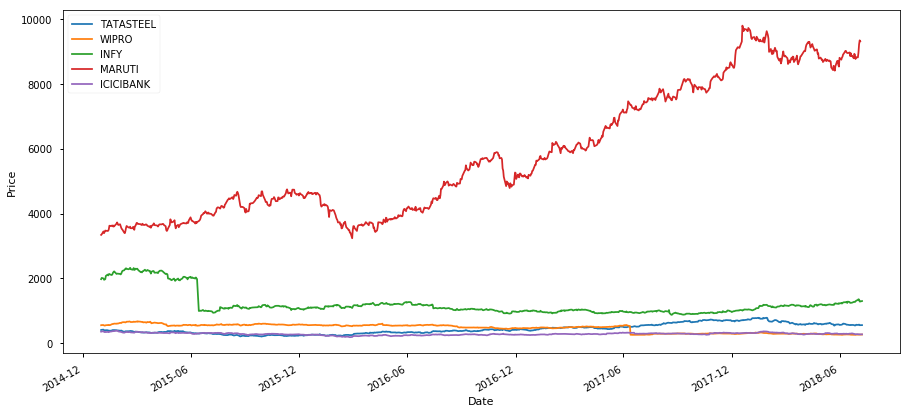

In [6]:
df.plot(figsize=(15,7))
plt.ylabel('Price');

As each stock has different prices, it is difficult to compare between them to visualise any relationships. Some transformation can help to normalise this issue.

### Normalizing multiple stocks
Dividing all the closing price to the first closing price in the period.

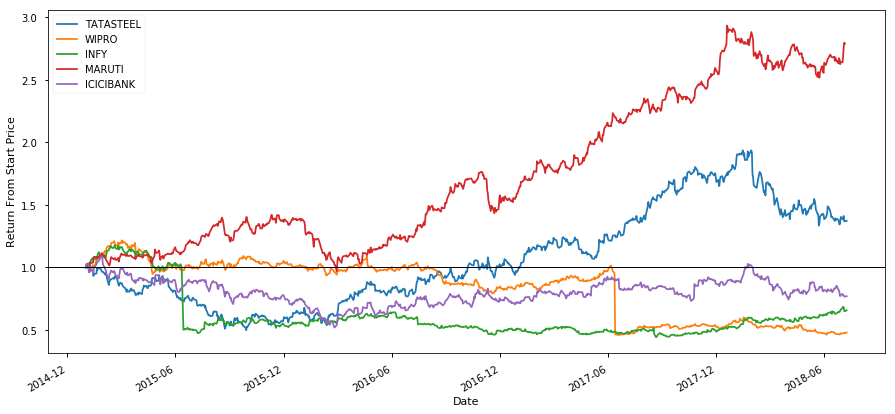

In [7]:
returnfstart = df.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(15,7)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price');

Another way is the plot the daily percentage change of stock price.

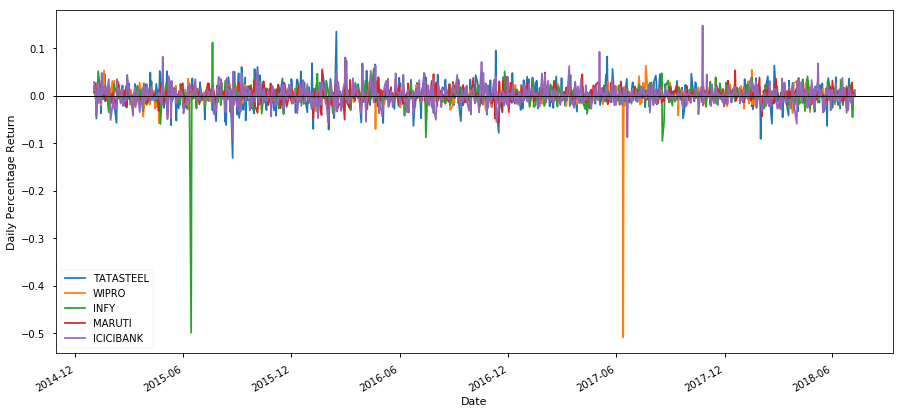

In [8]:
df2=df.pct_change()
 
df2.plot(figsize=(15,7))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return');

Because I have 5 stocks overlapping each other, it is a little hard to make any comparisons here. 
It is better to have some hard numbers so lets do some correlation plots.

### Correlation Plots

/Users/adhiman/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


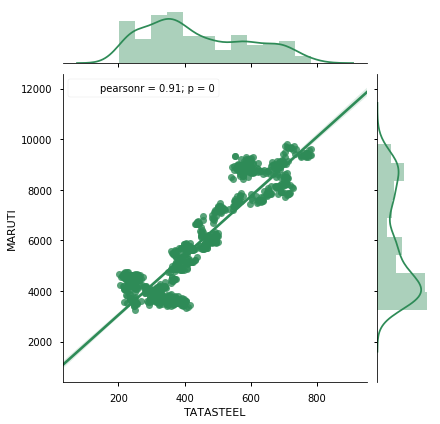

In [9]:
sns.jointplot('TATASTEEL', 'MARUTI', df, kind='reg', color='seagreen');

Just looking at the chart, you can see that the relationship is somewhat linear. Strongly correlated stocks can be used in **pair trading**

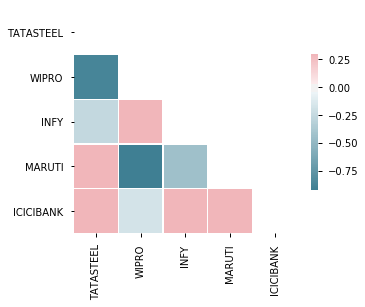

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

PairGrid can be used for paired comparisons with flexibility on the type of charts being plotted. For this case, a scatterplots, kde plots and histograms are plotted.

/Users/adhiman/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/adhiman/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


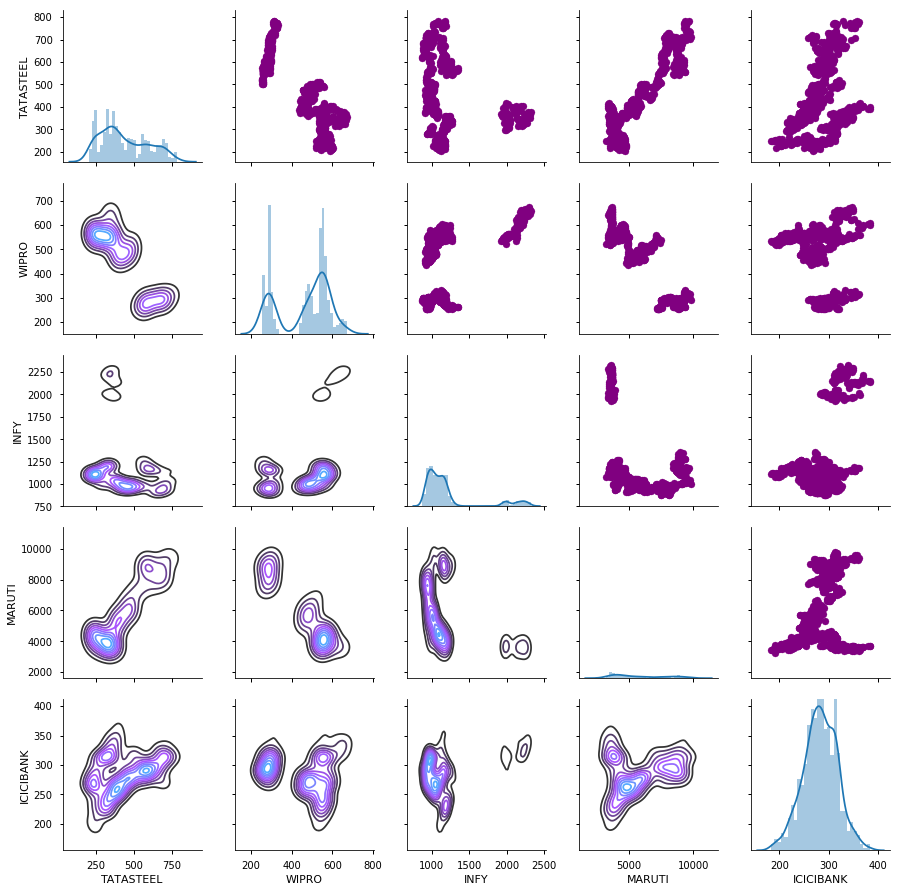

In [11]:
fig = sns.PairGrid(df.dropna())
# define top, bottom and diagonal plots
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, cmap='cool_d')
fig.map_diag(sns.distplot, bins=30);